# Infeasibility analysis on a cluster

Perform a simple analysis on the results of a UQ evaluation on a cluster using Dask.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from infeas import analyse

In [2]:
campaign, samples = analyse.read_campaign(campaign_name="example_cluster")
samples

Reading in campaign database.
Campaign read in. Number of samples = 256


run_id  iteration    aspect    triang  psepbqarmax     hfact  fdene  \
0         1          0  3.013886  0.413886     8.769432  1.013886    1.2   
1         2          0  3.013886  0.413886     8.769432  1.066002    1.2   
2         3          0  3.013886  0.413886     8.769432  1.133998    1.2   
3         4          0  3.013886  0.413886     8.769432  1.186114    1.2   
4         5          0  3.013886  0.413886     9.030009  1.013886    1.2   
..      ...        ...       ...       ...          ...       ...    ...   
251     252          0  3.186114  0.586114     9.369991  1.186114    1.2   
252     253          0  3.186114  0.586114     9.630568  1.013886    1.2   
253     254          0  3.186114  0.586114     9.630568  1.066002    1.2   
254     255          0  3.186114  0.586114     9.630568  1.133998    1.2   
255     256          0  3.186114  0.586114     9.630568  1.186114    1.2   

     coreradius  fimp_2  fimp_14  ...  feffcd  etath  etaiso  boundl_18  \
0          0.75     0.1  0.00001  ...     1.0  0.375     0.9       3.25   
1          0.75     0.1  0.00001  ...     1.0  0.375     0.9       3.25   
2          0.75     0.1  0.00001  ...     1.0  0.375     0.9       3.25   
3          0.75     0.1  0.00001  ...     1.0  0.375     0.9       3.25   
4          0.75     0.1  0.00001  ...     1.0  0.375     0.9       3.25   
..          ...     ...      ...  ...     ...    ...     ...        ...   
251        0.75     0.1  0.00001  ...     1.0  0.375     0.9       3.25   
252        0.75     0.1  0.00001  ...     1.0  0.375     0.9       3.25   
253        0.75     0.1  0.00001  ...     1.0  0.375     0.9       3.25   
254        0.75     0.1  0.00001  ...     1.0  0.375     0.9       3.25   
255        0.75     0.1  0.00001  ...     1.0  0.375     0.9       3.25   

     pinjalw      alstroh  sig_tf_wp_max  boundu_2  vary_param  \
0       61.0  660000000.0    640000000.0      12.0               
1       61.0  660000000.0    640000000.0      12.0               
2       61.0  660000000.0    640000000.0      12.0               
3       61.0  660000000.0    640000000.0      12.0               
4       61.0  660000000.0    640000000.0      12.0               
..       ...          ...            ...       ...         ...   
251     61.0  660000000.0    640000000.0      12.0               
252     61.0  660000000.0    640000000.0      12.0               
253     61.0  660000000.0    640000000.0      12.0               
254     61.0  660000000.0    640000000.0      12.0               
255     61.0  660000000.0    640000000.0      12.0               

     rms_vio_constr_res  
0              0.113375  
1              0.112349  
2              0.111968  
3              0.112222  
4              0.110972  
..                  ...  
251            0.086786  
252            0.085817  
253            0.084325  
254            0.083676  
255            0.083927  

[256 rows x 25 columns]


## Plot some samples

The most basic analysis.


Text(0.5, 1.0, 'Variability in vio_constr_res against aspect ratio')

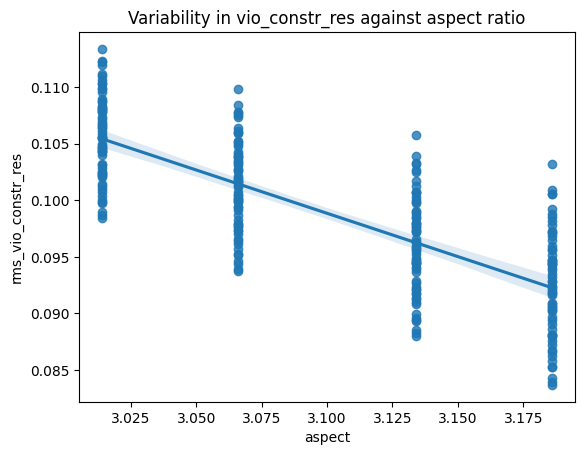

In [3]:
# Plot 2 vars from sample against each other
# Input epistemic uncertainty aspect against vio_constr_res
ax = sns.regplot(x=samples["aspect"], y=samples["rms_vio_constr_res"])
ax.set_xlabel("aspect")
ax.set_ylabel("rms_vio_constr_res")
ax.set_title("Variability in vio_constr_res against aspect ratio")

## Analysis

Analyse vio_constr_residuals, the violated constraint residuals.

### KDE for `vio_constr_res` from EasyVVUQ (plotted with seaborn)


Text(0, 0.5, 'Probability density')

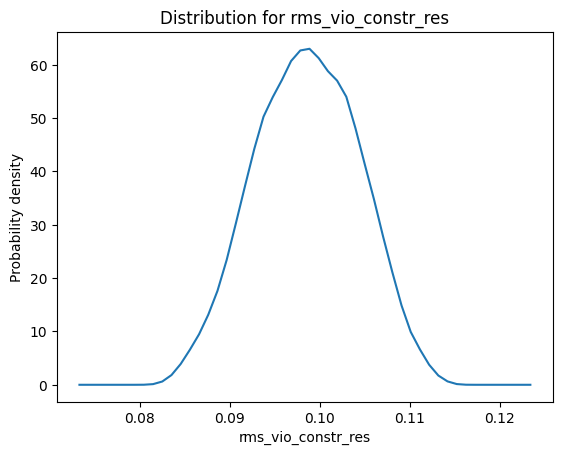

In [4]:
# Try to analyse all outputs variables: produces a linalg error
# results = campaign.analyse(qoi_cols=palph2_inputs)

# Analyse a single output variable, vio_constr_res
results = campaign.analyse(qoi_cols=["rms_vio_constr_res"])

# Get its distribution
dist = results.get_distribution(qoi="rms_vio_constr_res")

# Locations for density function to be evaluated
# (This is taken from easyvvuq's fusion tutorial)
x = np.linspace(dist.lower[0], dist.upper[0])
pdf = dist.pdf(x)

# Plot
ax = sns.lineplot(x=x, y=pdf, markers=True)
ax.set_title("Distribution for rms_vio_constr_res")
ax.set_xlabel("rms_vio_constr_res")
ax.set_ylabel("Probability density")

PDF for `vio_constr_res`. Appears right from looking at the EasyVVUQ tutorial (fusion Dask).

## Sobol indices


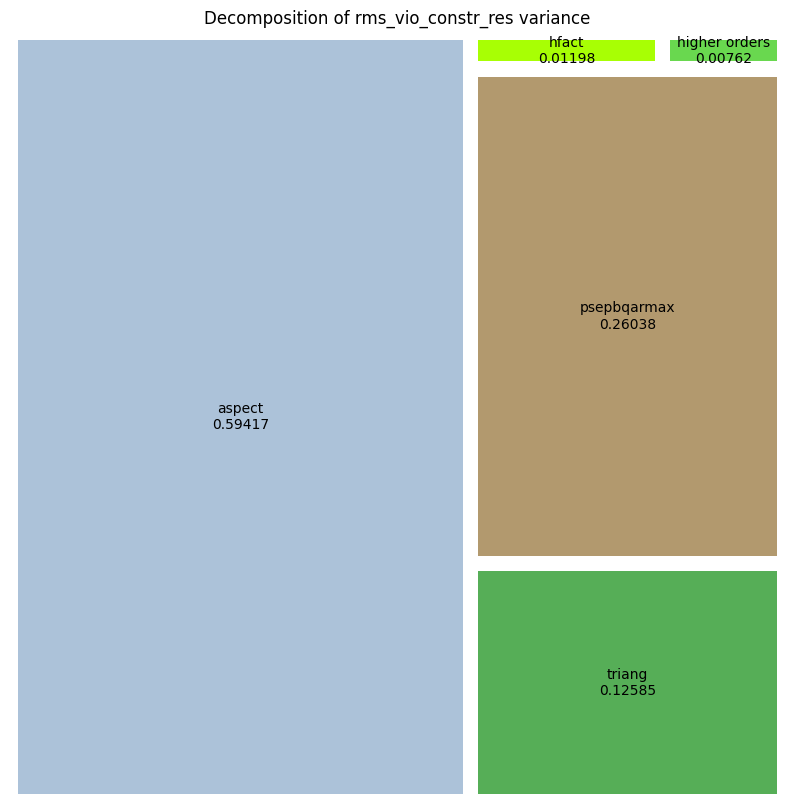

In [5]:
# results.plot_moments(qoi="vio_constr_res")
# results.plot_sobols_first("vio_constr_res") # only for vecotr qois. Like constraint vectors?

fig, ax = plt.subplots()
results.plot_sobols_treemap(
    "rms_vio_constr_res", figsize=(10, 10), ax=ax, filename="sobols"
)